# Imports

In [9]:
from keras import backend as K
import tensorflow as tf
config = tf.ConfigProto(device_count = {'CPU': 1}, intra_op_parallelism_threads=7, inter_op_parallelism_threads=1)
session = tf.Session(config=config)
K.set_session(session)

import keras as k
import keras
from keras import applications
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.layers import Input

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import DistanceMetric
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['xtick.labelsize'] = 22
matplotlib.rcParams['ytick.labelsize'] = 22
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.titlesize'] = 30
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
import os
import sys

# Change PYTHONPATH to allow for relative import
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from keras.layers import (Lambda, MaxPooling1D, Flatten,
                          Dropout, Dense, Input)
from keras.models import Model
from keras.backend import floatx
from phcnn.layers import PhyloConv1D, euclidean_distances
from phcnn.build_train import *
from keras.utils.np_utils import to_categorical


%load_ext autoreload
%autoreload 2

In [112]:
nb_neighbors = 5
nb_filters = 4
top_k = 2000
batch_size = 100
model_name = 'model_ALL_100_iter_100_feats_top2k.h5'
pat_lr = 2 #patience for decreasing LR
pat_max = 4 #patience to abort learning
path_MDS = '/home/sakalouski/TAD_Trento/distance matrices/MDSes/dist_matrix_correl_ALL_MDS.csv'
tcga_path = "/home/nanni/Data/TCGA/all_tcga.tsv"
tads_path = "/home/nanni/Projects/ML/TAD_Trento/all_tcga_TAD.tsv"

In [108]:
seed = 7
np.random.seed(seed)

In [109]:
X_train,X_test,Y_train,Y_test = get_raw_data(tcga_path, top_k)

In [69]:
MDSmat = mds_load_reshape(path_MDS, batch_size)

In [70]:
MDSmat.shape

(100, 1999, 2000, 1)

In [110]:
Y_input_test = keras.utils.to_categorical(Y_test, num_classes=None)
Y_input_train = keras.utils.to_categorical(Y_train, num_classes=None)

X_test_inp = X_test.reshape(X_test.shape[0],X_test.shape[1],-1)
X_train_inp = X_train.reshape(X_train.shape[0],X_train.shape[1],-1)

In [16]:
Y_input_train.shape

(4200, 12)

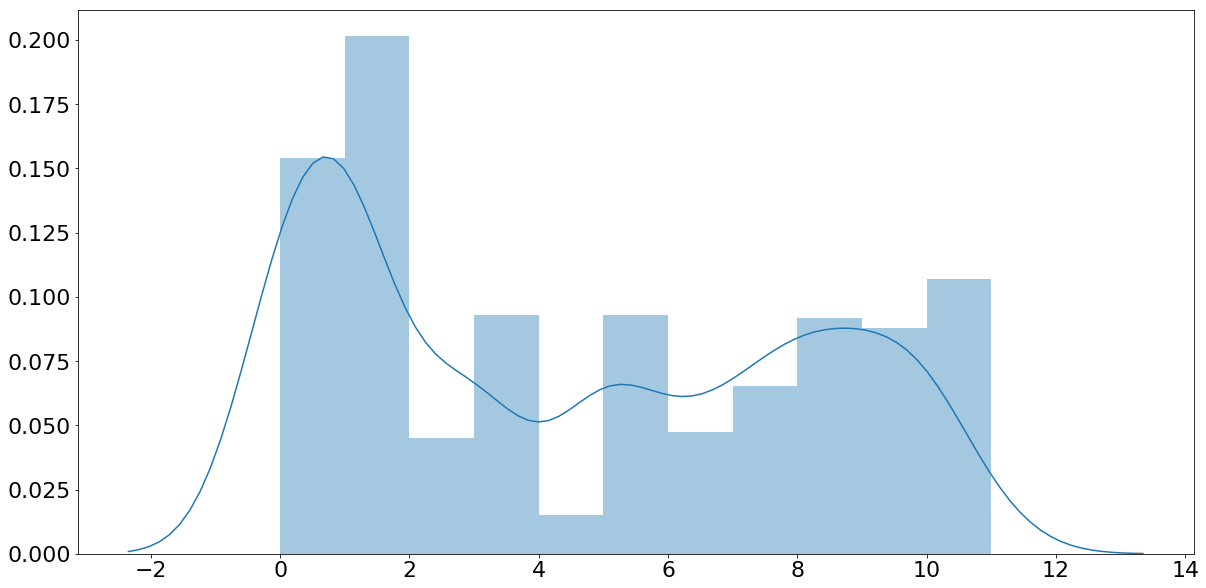

In [85]:
import seaborn as sns
sns.distplot(Y_test)
plt.show()

# Network

In [114]:
model = create_model(X_train, MDSmat, nb_filters, nb_neighbors)
model_trained = train_model(model, X_train_inp, Y_input_train, batch_size, 7, 30, model_name, MDSmat, dense = False)   

Current loss is:  23.01230067298526
Model Saved as: model_ALL_100_iter_100_feats_top2k.h5
Current loss is:  17.157569106203628
Model Saved as: model_ALL_100_iter_100_feats_top2k.h5
Current loss is:  15.759712847825607
Model Saved as: model_ALL_100_iter_100_feats_top2k.h5


KeyboardInterrupt: 

In [ ]:
Y_pred = np.array(Y_input_test)
for i in range(0,Y_pred.shape[0]):
    Y_pred[i,:] = model.predict(x = [X_test_inp[[i],:,:]])#, MDSmat[1:2:,:,:,:]])

In [ ]:
Y_pred_1d = to_1d_labels(Y_pred)
rep = classification_report(Y_test,Y_pred_1d)
print(rep)